In [16]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv

In [17]:
class PlayerState(TypedDict):
    runs: int
    fours:int
    sixes:int
    balls:int
    strike_rate:float
    boundary_perc:float
    boundaries_per_bowl:float
    summary:str


In [28]:
def calc_strike_rate(state:PlayerState)->PlayerState:
    runs=state['runs']
    balls=state['balls']
    sr=round((runs/balls)*100,2)
    return {'strike_rate':sr}

In [29]:
def calc_boundary_perc(state:PlayerState)->PlayerState:
    fours=state['fours']
    sixes=state['sixes']
    runs=state['runs']
    boundaries_runs= fours*4+sixes*6
    boundary_perc=round((boundaries_runs/runs)*100,2)
    return {'boundary_perc':boundary_perc}


In [53]:
def calc_bpb(state:PlayerState)->PlayerState:
    fours=state['fours']
    sixes=state['sixes']
    balls=state['balls']
    boundaries= fours+sixes
    boundaries_per_bowl=round((balls/boundaries),2)
    return {'boundaries_per_bowl':boundaries_per_bowl}

In [54]:
def generate_summary(state:PlayerState)->PlayerState:
   runs=state['runs']
   fours=state['fours']
   sixes=state['sixes']
   balls=state['balls']
   sr=state['strike_rate']
   boundary_per=state['boundary_perc']
   bpb=state['boundaries_per_bowl']

   summary=f"""The summary for a cricke player who has scored {runs} runs,{fours} fours,{sixes} six,{balls} balls,{sr} strike rate, {boundary_per} boundary percentage , {bpb} balls per boundaries 
                  """
   state['summary']=summary
   return state

In [55]:
graph=StateGraph(PlayerState)
graph.add_node('calc_strike_rate',calc_strike_rate)
graph.add_node('calc_boundary_perc',calc_boundary_perc)
graph.add_node('calc_bpb',calc_bpb)
graph.add_node('generate_summary',generate_summary)

graph.add_edge(START,'calc_strike_rate')
graph.add_edge(START,'calc_boundary_perc')
graph.add_edge(START,'calc_bpb')

graph.add_edge('calc_strike_rate','generate_summary')
graph.add_edge('calc_boundary_perc','generate_summary')
graph.add_edge('calc_bpb','generate_summary')

graph.add_edge('generate_summary',END)

workflow=graph.compile()


In [56]:
initial_state={'runs':100,'balls':50,'fours':4,'sixes':6}
final_state=workflow.invoke(initial_state)
final_state

{'runs': 100,
 'fours': 4,
 'sixes': 6,
 'balls': 50,
 'strike_rate': 200.0,
 'boundary_perc': 52.0,
 'boundaries_per_bowl': 5.0,
 'summary': 'The summary for a cricke player who has scored 100 runs,4 fours,6 six,50 balls,200.0 strike rate, 52.0 boundary percentage , 5.0 balls per boundaries \n                  '}

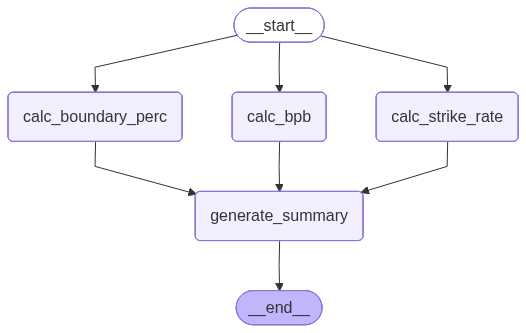

In [20]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())